# Digit Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

## Data Preprocessing

In [3]:
# Path to folder containing csv files
dataset_path = 'data/'

In [4]:
train_df = pd.read_csv(dataset_path+'train.csv')
train_data = train_df.values
train_data.shape

(42000, 785)

In [5]:
# Extract labels
train_labels = train_data[:, 0]

In [6]:
# Extract images
train_images = train_data[:,1:]
train_images.shape

(42000, 784)

In [7]:
# Test Data
test_df = pd.read_csv(dataset_path+'test.csv')
test_data = train_df.values
test_data.shape

(42000, 785)

## Visualization

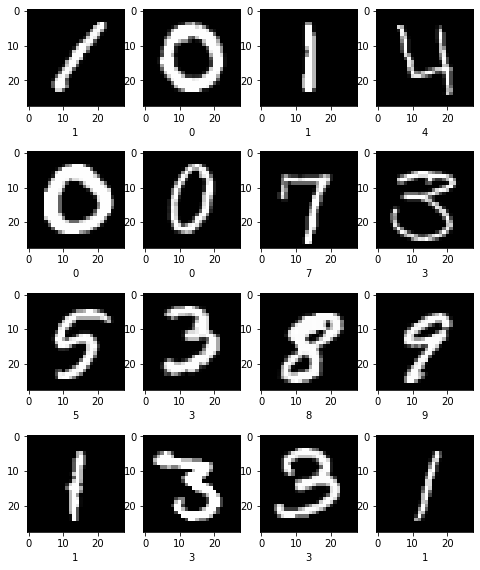

In [8]:
# Visualize first few images of the train-set
fig = plt.figure(figsize=(8,10))
ROW, COL = 4, 4
for i in range(1, ROW*COL+1):
    fig.add_subplot(ROW, COL, i)
    plt.imshow(train_images[i-1].reshape(28, 28), cmap='gray')
    plt.xlabel(train_labels[i-1])
plt.show()

## Modelling

We will make different models to evaluate our results

#### Make Validation Data
We will test different models on validation set

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [11]:
print('Size of training data:', len(X_train))
print('Size of Validation data:', len(X_val))

Size of training data: 33600
Size of Validation data: 8400


### Logistic Regression 

In [12]:
clf = linear_model.LogisticRegression(random_state=42, solver='saga', n_jobs=8).fit(X_train, y_train)

/home/shashank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/shashank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [16]:
# Predictions
preds = clf.predict(X_val)

In [24]:
accuracy = np.sum(preds == y_val) / len(preds)
accuracy

0.9116666666666666

In [27]:
# Prediction on test data
preds = clf.predict(test_data)

In [28]:
# Make submission
preds

array([2, 0, 9, ..., 3, 9, 2])

In [44]:
preds_df = pd.DataFrame(preds)
preds_df.index += 1
preds_df = preds_df.reset_index()
preds_df.columns = ['ImageId','Label']
preds_df.to_csv('submission.csv', index=False)

## Neural Network

In [12]:
import torch
import torchvision

In [13]:
# Convert numpy array to pytorch tensor

X_train, X_val, y_train, y_val = map(torch.Tensor, [X_train, X_val, y_train, y_val])

In [14]:
# Create torch dataset
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(X_val, y_val)

In [15]:
# Create torch dataloader
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, num_workers=6)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, num_workers=6)

In [16]:
next(iter(trainloader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([6., 5., 3., 4., 7., 8., 6., 7., 0., 9., 9., 7., 6., 9., 9., 3., 1., 6.,
         3., 0., 6., 6., 5., 6., 0., 6., 9., 5., 8., 0., 5., 0.])]

In [18]:
# Network Architecture
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc1(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [19]:
# Loss function
criterion = nn.CrossEntropyLoss()

In [21]:
# Optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Training the network
